# 0. Imports

## 0.1. Importing Libs

In [2]:
import pandas as pd
import math
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from boruta import BorutaPy
from IPython.display import Image

## 0.2. Loading Data

In [3]:
df_raw = pd.read_csv(r'C:\Users\vitor.musachio\Documents\Notebooks\Ifood ML Case\Datasets\ml_project1_data.csv')
df_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# 1. Data Description

## 1.1. Data Dimensions

In [3]:
df1 = df_raw.copy()

print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 2240
Number of Cols: 29


## 1.2. Data Types

In [4]:
df1.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
# changing date dtype

df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
df1.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

## 1.3. Check NA

In [6]:
df1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Income - adding a value bigger than the max value from column
df1['Income'] = df1['Income'].apply(lambda x: 999999.0 if math.isnan(x) else x)

df1.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## 1.4. Descriptive Statistical

In [8]:
# creating dataframe with numeric cols only
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# creating dataframe with categoric cols only
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'])

### 1.4.1. Numerical Attributes

In [9]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std']
m

,attributes,min,max,range,mean,median,std
0,ID,0.0,11191.0,11191.0,5592.159821,5458.5,3245.937415
1,Year_Birth,1893.0,1996.0,103.0,1968.805804,1970.0,11.981394
2,Income,1730.0,999999.0,998269.0,62401.734375,51741.5,100734.437703
3,Kidhome,0.0,2.0,2.0,0.444196,0.0,0.538278
4,Teenhome,0.0,2.0,2.0,0.506250,0.0,0.544417
5,Recency,0.0,99.0,99.0,49.109375,49.0,28.955987
6,MntWines,0.0,1493.0,1493.0,303.935714,173.5,336.522251
7,MntFruits,0.0,199.0,199.0,26.302232,8.0,39.764555
8,MntMeatProducts,0.0,1725.0,1725.0,166.950000,67.0,225.664984
9,MntFishProducts,0.0,259.0,259.0,37.525446,12.0,54.616784


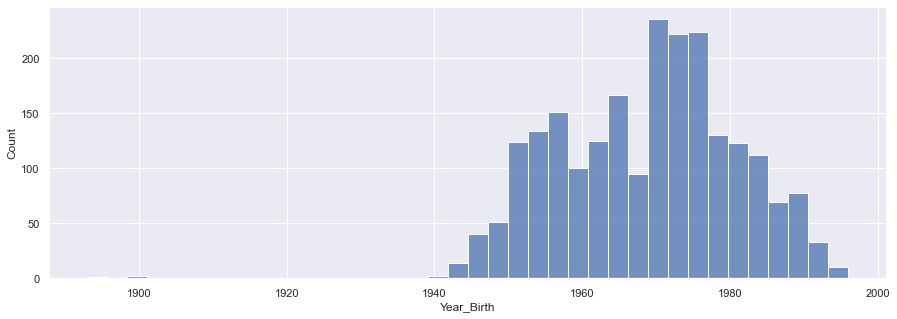

In [10]:
# plotting year of birth distribution

sns.set(rc={'figure.figsize':(15,5)})
sns.histplot(df1['Year_Birth'])

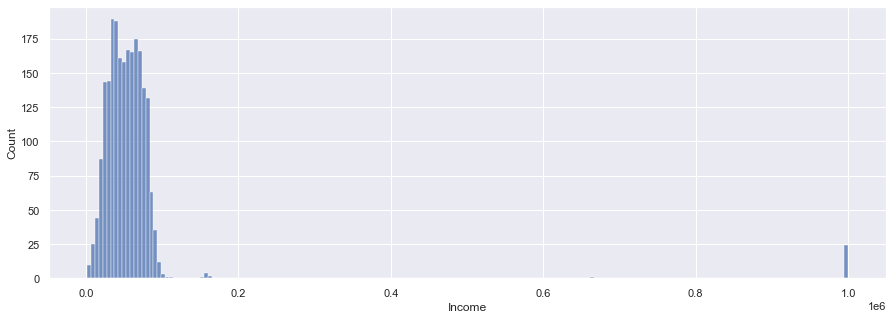

In [11]:
# plotting income distribution

sns.set(rc={'figure.figsize':(15,5)})
sns.histplot(df1['Income'])

### 1.4.2. Categorical Attributes

In [12]:
cat_attributes.apply(lambda x: x.unique().shape[0])

Education         5
Marital_Status    8
dtype: int64

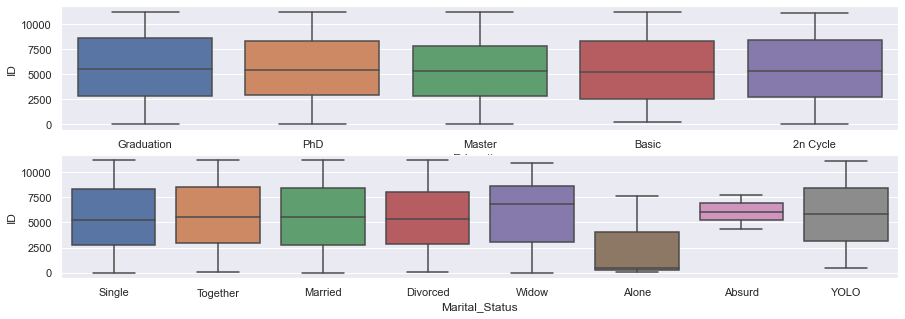

In [13]:
plt.subplot(2,1,1)
sns.boxplot(x='Education', y='ID', data=df1)

plt.subplot(2,1,2)
sns.boxplot(x='Marital_Status', y='ID', data=df1)

# 2. Business Hypoteses

In [14]:
df2 = df1.copy()

## 2.1. Mind Map Hypoteses

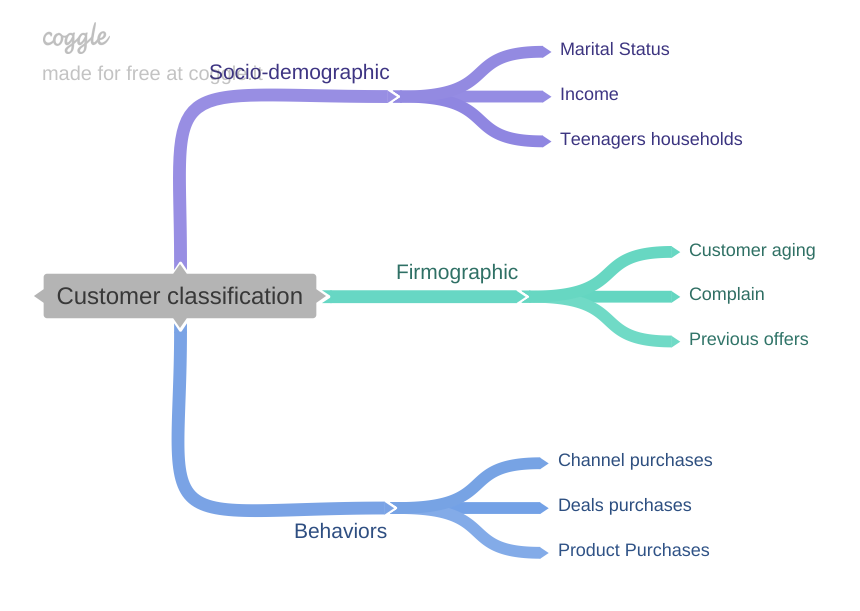

In [4]:
Image(r'C:\Users\vitor.musachio\Documents\Notebooks\Ifood ML Case\Images\mind_map.png')

## 2.2. Hypotesis List

**H1.** Customers with more complaints tend to accept fewer offers

**H2.** Customers who buy more products on sale tend to accept more offers

**H3.** Higher-income customers tend to accept more offers

**H4.** Customers with a greater number of young people at home tend to accept more offers

**H5.** Customers who bought products more recently tend to accept more offers

**H6.** New customers tend to accept more offers

**H7.** Customers who accepted more previous campaigns tend to accept more offers


# 3. Feature Engineering

In [16]:
df3 = df2.copy()

## 3.1. Add Columns

In [17]:
# customer since year
df3['Yr_Customer'] = df3['Dt_Customer'].dt.year

# customer since in days
df3['CustomerTimeInDays'] = (df3['Dt_Customer']-df3['Dt_Customer'].min())
df3['CustomerTimeInDays'] = df3['CustomerTimeInDays'].dt.days.astype('int64')

# sum of accepted campaigns
df3['TotalAccepted'] = df3['AcceptedCmp1']+df3['AcceptedCmp2']+df3['AcceptedCmp3']+df3['AcceptedCmp4']+df3['AcceptedCmp5']

# sum of kidhome and teenhome
df3['TeenKidHome'] = df3['Kidhome']+df3['Teenhome']

## 3.2 Drop Columns

In [18]:
cols_drop = ['Z_CostContact','Z_Revenue','Dt_Customer', 'ID']
df3 = df3.drop(cols_drop, axis=1)

In [19]:
df3.head().T

,0,1,2,3,4
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138,46344,71613,26646,58293
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Recency,58,38,26,26,94
MntWines,635,11,426,11,173
MntFruits,88,1,49,4,43
MntMeatProducts,546,6,127,20,118


# 4. Exploratory Analysis

## 4.1. Univariate Analysis

In [20]:
df4 = df3.copy()

### 4.1.1. Numerical Variables 

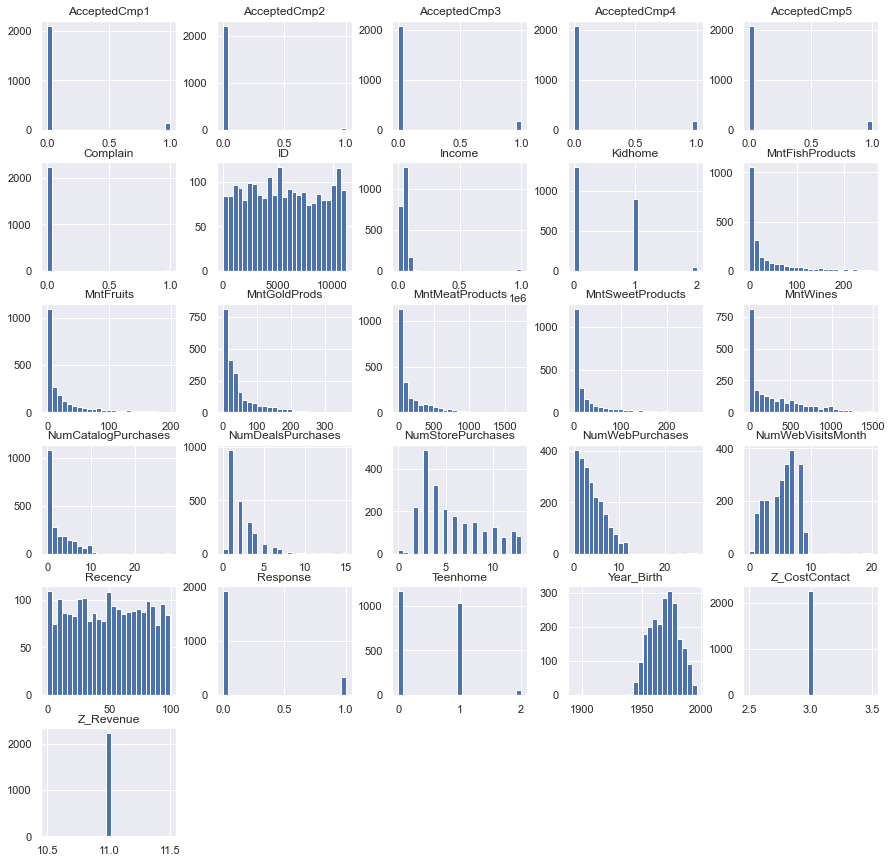

In [21]:
sns.set(rc={'figure.figsize':(15,15)})
num_attributes.hist(bins=25);

### 4.1.2. Categorical Variables 

C:\Users\vitor.musachio\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vitor.musachio\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


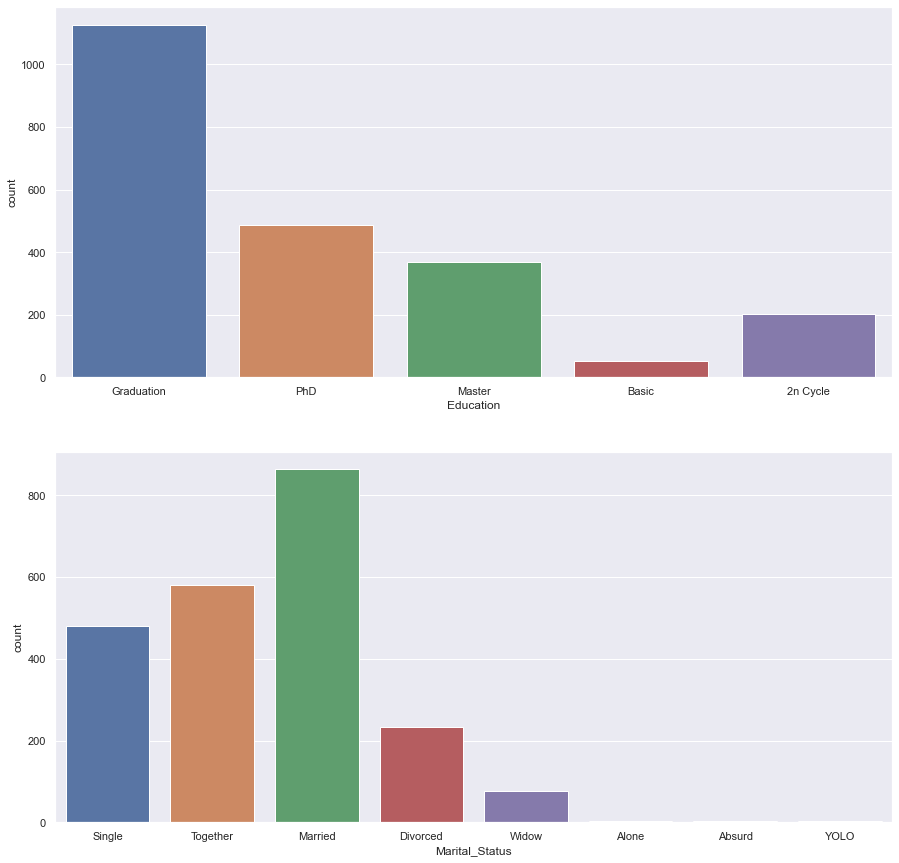

In [22]:
# Education
plt.subplot(2,1,1)
sns.countplot(df4['Education'])

# Marital Status
plt.subplot(2,1,2)
sns.countplot(df4['Marital_Status'])

## 4.2. Hypoteses Validation

### H1. Customers with more complaints tend to accept fewer offers
**True** - High correlation

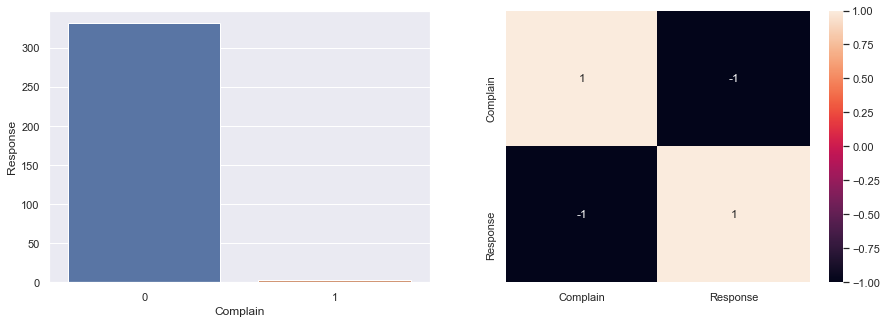

In [23]:
aux1 = df4[['Complain', 'Response']].groupby('Complain').sum().reset_index()

sns.set(rc={'figure.figsize':(15,5)})
plt.subplot(1,2,1)
sns.barplot(x='Complain', y='Response', data=aux1);

plt.subplot(1,2,2)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### H2. Customers who buy more deal products tend to accept more offers
**False** - High correlation

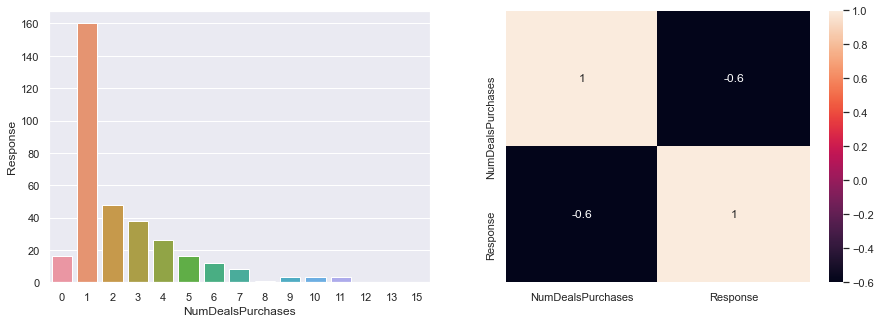

In [24]:
aux2 = df4[['NumDealsPurchases', 'Response']].groupby('NumDealsPurchases').sum().reset_index()

sns.set(rc={'figure.figsize':(15,5)})
plt.subplot(1,2,1)
sns.barplot(x='NumDealsPurchases', y='Response', data=aux2);

plt.subplot(1,2,2)
sns.heatmap(aux2.corr(method='pearson'), annot=True);

### H3. Higher-income customers tend to accept more offers
**False** - Low correlation

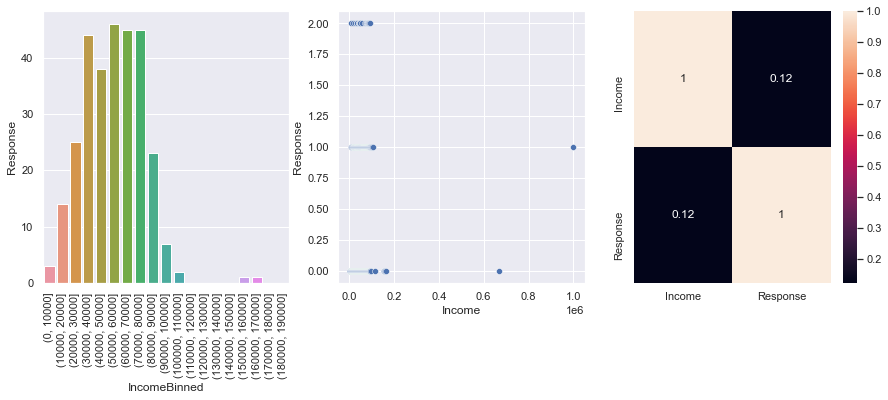

In [25]:
aux3 = df4[['Income', 'Response']].groupby('Income').sum().reset_index()
bins = list(np.arange(0,200000,10000))
aux3_1 = df4['IncomeBinned']=pd.cut(aux3['Income'], bins=bins)
aux3_1 = df4[['IncomeBinned', 'Response']].groupby('IncomeBinned').sum().reset_index()

plt.subplot(1,3,1)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='IncomeBinned', y='Response', data=aux3_1)
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sns.scatterplot(x='Income', y='Response', data=aux3);

plt.subplot(1,3,3)
sns.heatmap(aux3.corr(method='pearson'), annot=True);

### H4. Customers with a greater number of young people at home tend to accept more offers
**False** - High correlation

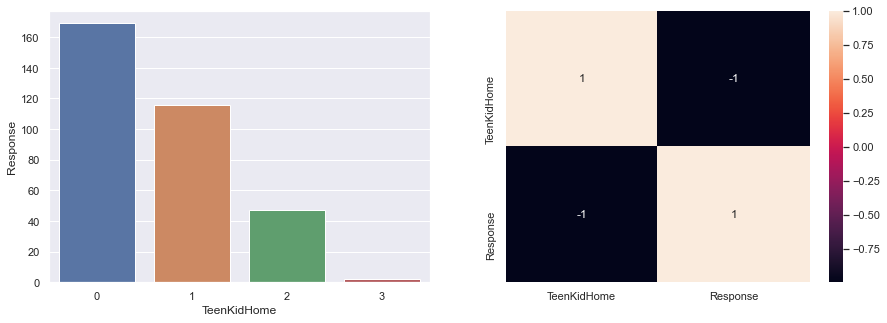

In [26]:
aux4 = df4[['TeenKidHome', 'Response']].groupby('TeenKidHome').sum().reset_index()

sns.set(rc={'figure.figsize':(15,5)})
plt.subplot(1,2,1)
sns.barplot(x='TeenKidHome', y='Response', data=aux4);

plt.subplot(1,2,2)
sns.heatmap(aux4.corr(method='pearson'), annot=True);

### H5. Customers who bought products more recently tend to accept more offers
**True** - High correlation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

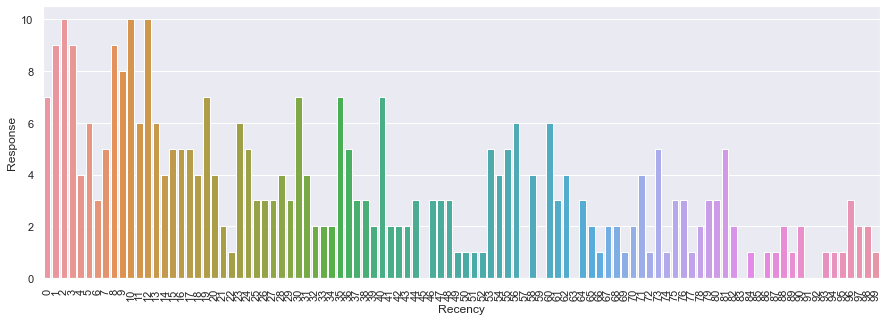

In [27]:
aux5 = df4[['Recency', 'Response']].groupby('Recency').sum().reset_index()

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Recency', y='Response', data=aux5);
plt.xticks(rotation=90)

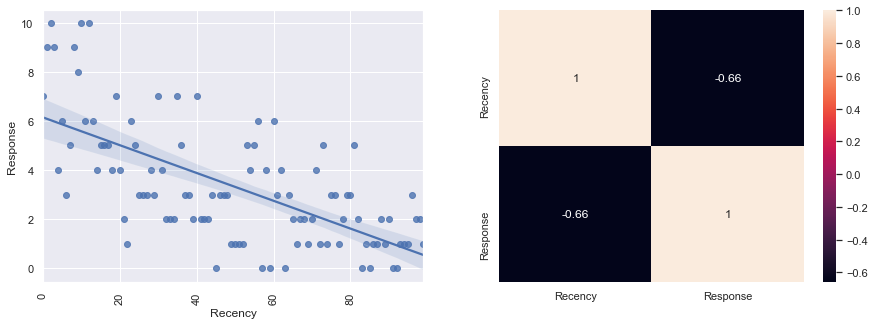

In [28]:
sns.set(rc={'figure.figsize':(15,5)})
plt.subplot(1,2,1)
sns.regplot(x='Recency', y='Response', data=aux5);
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.heatmap(aux5.corr(method='pearson'), annot=True);

### H6. New customers tend to accept more offers
**True** - Low correlation

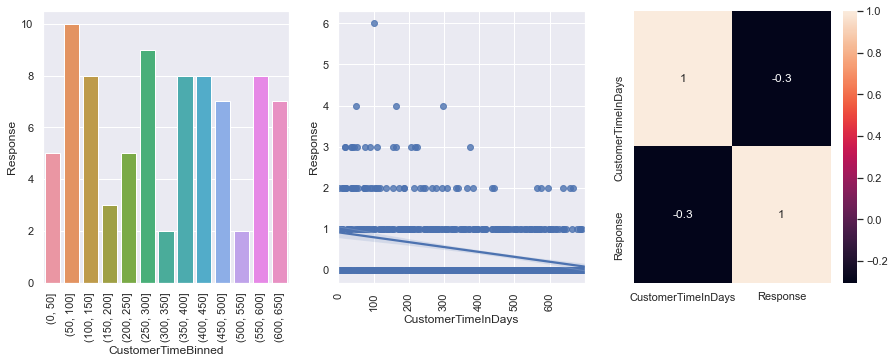

In [54]:
aux6 = df4[['CustomerTimeInDays', 'Response']].groupby('CustomerTimeInDays').sum().reset_index()
bins = list(np.arange(0,700,50))
aux6_1 = df4['CustomerTimeBinned']=pd.cut(aux6['CustomerTimeInDays'], bins=bins)
aux6_1 = df4[['CustomerTimeBinned', 'Response']].groupby('CustomerTimeBinned').sum().reset_index()


sns.set(rc={'figure.figsize':(15,5)})

plt.subplot(1,3,1)
sns.barplot(x='CustomerTimeBinned', y='Response', data=aux6_1)
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sns.regplot(x='CustomerTimeInDays', y='Response', data=aux6);
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.heatmap(aux6.corr(method='pearson'), annot=True);

### H7. Customers who accepted more previous campaigns tend to accept more offers
**False** - High Correlation

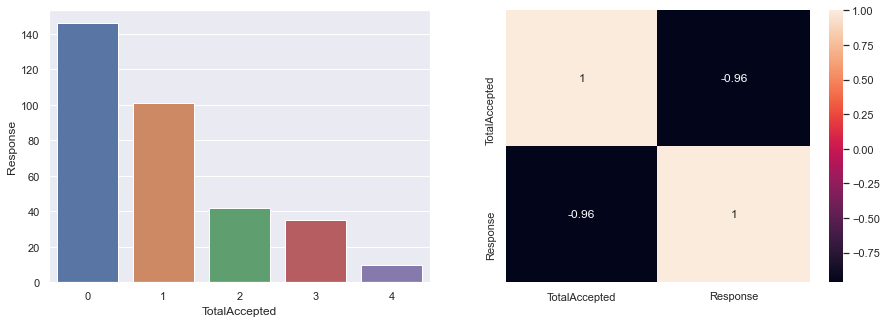

In [31]:
aux7 = df4[['TotalAccepted', 'Response']].groupby('TotalAccepted').sum().reset_index()

sns.set(rc={'figure.figsize':(15,5)})
plt.subplot(1,2,1)
sns.barplot(x='TotalAccepted', y='Response', data=aux7);

plt.subplot(1,2,2)
sns.heatmap(aux7.corr(method='pearson'), annot=True);

## 4.3. Multivariate Analysis

### 4.3.1. Pearsons Correlation

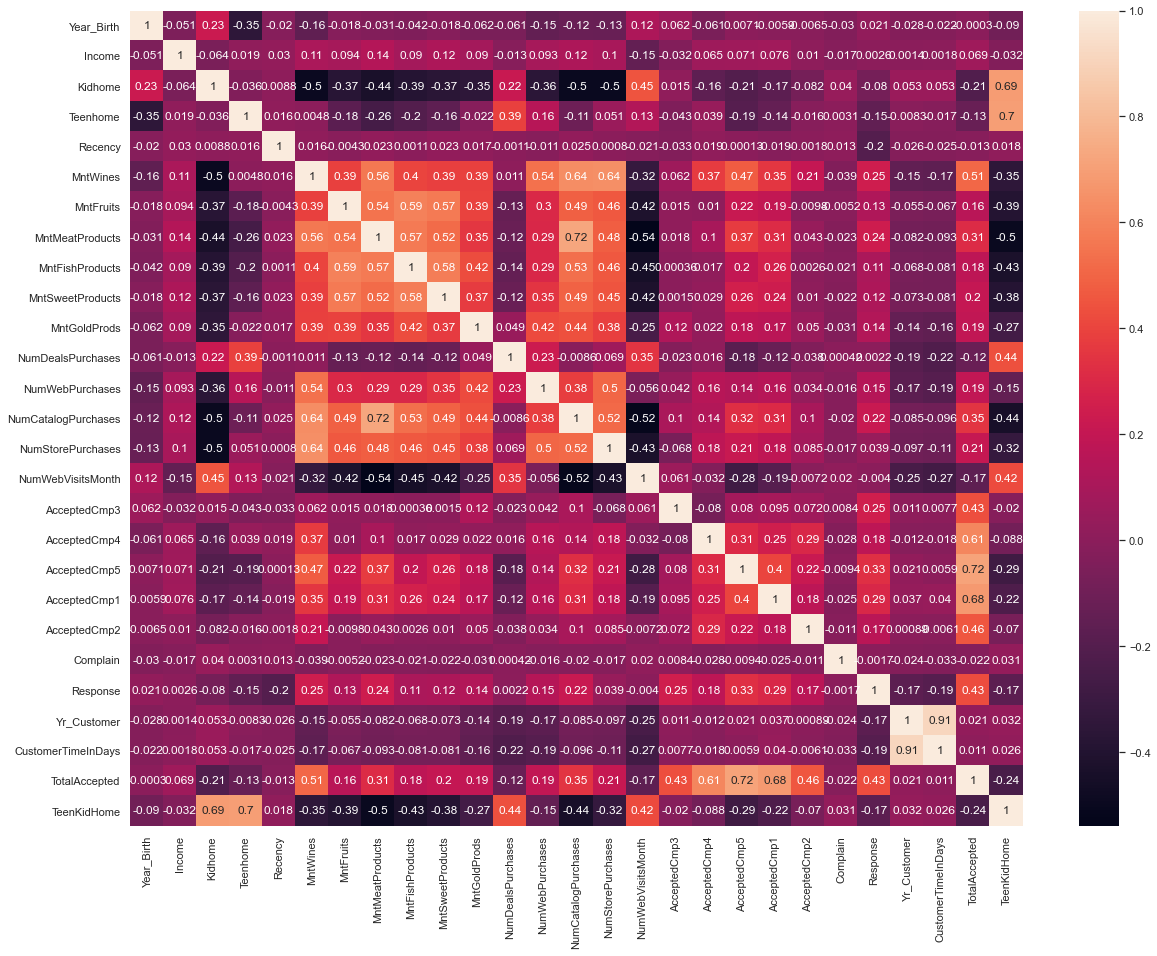

In [32]:
# calculating pearsons correlation

num_attributes = df4.select_dtypes(include=['int64', 'float64'])
correlation = num_attributes.corr(method='pearson')

plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot=True)

# 5. Data Preparation

In [33]:
df5 = df4.copy()

# remove binned columns for exploratory analysis
df5 = df5.drop(['IncomeBinned','CustomerTimeBinned'], axis=1)

## 5.1. Rescaling

### 5.1.1. Robust Scaler

In [34]:
# rescaling features with relevant outliers

rs = RobustScaler()

# Year_Birth
df5['Year_Birth']=rs.fit_transform(df5[['Year_Birth']].values)

# Income
df5['Income']=rs.fit_transform(df5[['Income']].values)

# MntWines
df5['MntWines']=rs.fit_transform(df5[['MntWines']].values)

# MntFruits
df5['MntFruits']=rs.fit_transform(df5[['MntFruits']].values)

# MntMeatProducts
df5['MntMeatProducts']=rs.fit_transform(df5[['MntMeatProducts']].values)

# MntFishProducts
df5['MntFishProducts']=rs.fit_transform(df5[['MntFishProducts']].values)

# MntSweetProducts
df5['MntSweetProducts']=rs.fit_transform(df5[['MntSweetProducts']].values)

# MntGoldProds
df5['MntGoldProds']=rs.fit_transform(df5[['MntGoldProds']].values)

# NumDealsPurchases
df5['NumDealsPurchases']=rs.fit_transform(df5[['NumDealsPurchases']].values)


### 5.1.1. MinMax Scaler

In [35]:
# rescaling features without relevant outliers

mms = MinMaxScaler()

# Recency
df5['Recency']=mms.fit_transform(df5[['Recency']].values)

# NumWebPurchases
df5['NumWebPurchases']=mms.fit_transform(df5[['NumWebPurchases']].values)

# NumCatalogPurchases
df5['NumCatalogPurchases']=mms.fit_transform(df5[['NumCatalogPurchases']].values)

# NumStorePurchases
df5['NumStorePurchases']=mms.fit_transform(df5[['NumStorePurchases']].values)

# NumWebVisitsMonth
df5['NumWebVisitsMonth']=mms.fit_transform(df5[['NumWebVisitsMonth']].values)

# Yr_Customer
df5['Yr_Customer']=mms.fit_transform(df5[['Yr_Customer']].values)

# TotalAccepted
df5['TotalAccepted']=mms.fit_transform(df5[['TotalAccepted']].values)

# CustomerTimeInDays
df5['CustomerTimeInDays']=mms.fit_transform(df5[['CustomerTimeInDays']].values)

# TeenKidHome
df5['TeenKidHome']=mms.fit_transform(df5[['TeenKidHome']].values)

## 5.2. Transformation

### 5.2.1. Encoding

In [36]:
# Encoding categoricals features

# Education - Ordinal Encoding
education_dict = {'Basic':1, '2n Cycle':2, 'Graduation':3, 'Master':4, 'PhD':5}
df5['Education']=df5['Education'].map(education_dict)

# Marital_Status - Label Encoding
le = LabelEncoder()
df5['Marital_Status']=le.fit_transform(df5['Marital_Status'])

In [37]:
df5.head(5).T

,0,1,2,3,4
Year_Birth,-0.722222,-0.888889,-0.277778,0.777778,0.611111
Education,3.000000,3.000000,3.000000,3.000000,5.000000
Marital_Status,4.000000,4.000000,5.000000,5.000000,3.000000
Income,0.190498,-0.160746,0.591806,-0.747385,0.195114
Kidhome,0.000000,1.000000,0.000000,1.000000,1.000000
Teenhome,0.000000,1.000000,0.000000,0.000000,0.000000
Recency,0.585859,0.383838,0.262626,0.262626,0.949495
MntWines,0.960458,-0.338189,0.525494,-0.338189,-0.001041
MntFruits,2.500000,-0.218750,1.281250,-0.125000,1.093750
MntMeatProducts,2.217593,-0.282407,0.277778,-0.217593,0.236111


# 6. Feature Selection

In [38]:
df6 = df5.copy()

## 6.1. Splitting Dataset into Training and Test

In [39]:
# splitting with 70/30 ratio

x_train, x_test, y_train, y_test = train_test_split(df6.drop('Response',axis=1),df6['Response'],test_size=0.3)

## 6.2. Boruta as Feature Selector

In [40]:
# training and test dataset

x_train_n = x_train.values
y_train_n = y_train.values.ravel()

# define random forest regressor
rf = RandomForestRegressor(n_jobs=-1)

# define boruta
boruta = BorutaPy(rf,n_estimators='auto',verbose=2,random_state=42).fit(x_train_n, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	24
I

In [41]:
cols_selected = boruta.support_.tolist()

# best features
x_train_fs = x_train
selected_boruta = x_train_fs.iloc[:, cols_selected].columns.to_list()

# not selected boruta
not_selected_boruta = np.setdiff1d(x_train_fs.columns,selected_boruta)

In [42]:
# features selected by boruta

selected_boruta

['Recency', 'MntMeatProducts', 'CustomerTimeInDays', 'TotalAccepted']

In [43]:
# features discarded by boruta

not_selected_boruta

array(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntSweetProducts', 'MntWines', 'NumCatalogPurchases',
       'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases',
       'NumWebVisitsMonth', 'TeenKidHome', 'Teenhome', 'Year_Birth',
       'Yr_Customer'], dtype=object)

## 6.3. Final Feature Selection

In [44]:
#selected_boruta = ['Recency', 'MntWines', 'MntMeatProducts', 'AcceptedCmp3', 'AcceptedCmp5']

#add_features = ['Income']

#selected_boruta.extend(add_features)

In [45]:
selected_boruta

['Recency', 'MntMeatProducts', 'CustomerTimeInDays', 'TotalAccepted']

# 7. Machine Learning Modelling

In [46]:
# define train and test datasets with boruta best features selection

x_train = x_train[selected_boruta]
x_test = x_test[selected_boruta]

## 7.1. Implementing the KNN Algorithm

In [47]:
# define KNN algorithm
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)

# KNN fit
knn.fit(x_train, y_train)

# KNN predict
predict = knn.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 7.2. Validations

### 7.2.1. Confusion Matrix

In [48]:
pd.crosstab(y_test,predict, rownames=['Real'], colnames=['Predict'],margins=True)

Predict,0,1,All
Real,,,
0,550,16,566
1,71,35,106
All,621,51,672


### 7.2.2. Classification Metrics

In [49]:
# verifying accuracy, recall and f1-score

target_names = ['0','1']
print(metrics.classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       566
           1       0.69      0.33      0.45       106

    accuracy                           0.87       672
   macro avg       0.79      0.65      0.69       672
weighted avg       0.85      0.87      0.85       672



### 7.2.3. Cross Validation

In [50]:
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
scores

array([0.86305732, 0.88216561, 0.85031847, 0.87220447, 0.88178914])

In [51]:
# define the model accuracy with standart deviation before cross validation

acc = np.round(np.mean(scores)*100,2).astype(str) + '% +/- ' + np.round(np.std(scores),2).astype(str)
print('Model Accuracy:' + acc)

Model Accuracy:86.99% +/- 0.01


# 8. Customer Classification

In [52]:
df8 = pd.merge(x_train, y_train, left_index=True, right_index=True)

## 8.1. Features Pairplot

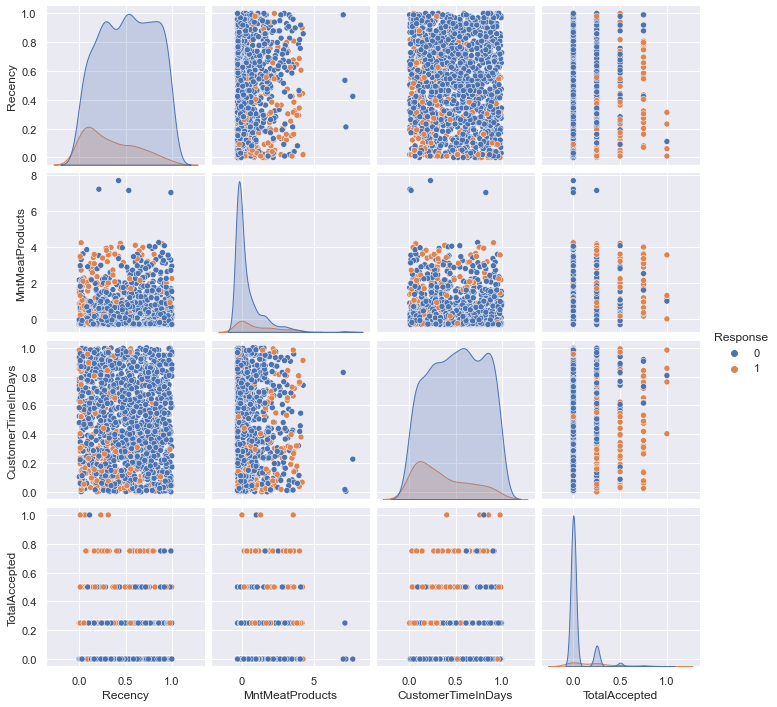

In [53]:
sns.pairplot(df8, hue="Response")

## 8.2. Customer Segmentation

**1.** Most recently purchased customers

**2.** Newer Customers

**3.** Customers with greater amount on meat products in last 2 years

**4.** Customers with most accepted offers in the last 5 campaigns

**Project Description:** https://docs.google.com/presentation/d/1IGYMvTximVfx_LTtgN4ii5kPr8E_W4-baOwGIZdV6Bw/edit?usp=sharing